In [1]:
import torch
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt

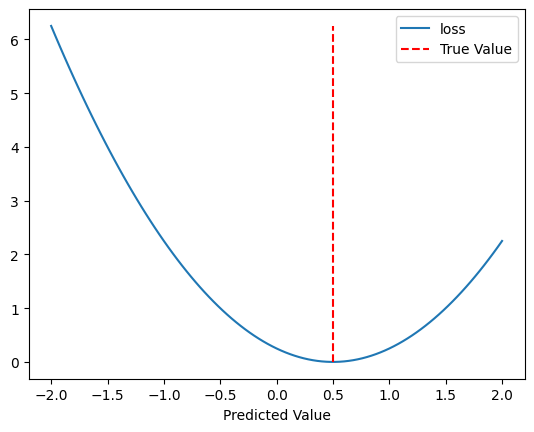

In [2]:
# loss function 
lossfunMSE = nn.MSELoss()

# create predictions and real answer
yHat = torch.linspace(-2,2,101)
y = torch.tensor(.5)

# compute MSE loss function
L = np.zeros(101)
for i, yy in enumerate(yHat):
    L[i]= lossfunMSE(yy,y)

plt.plot(yHat, L, label = 'loss')
plt.plot([y,y], [0, np.max(L)], 'r--', label = 'True Value')
plt.xlabel('Predicted Value')
plt.legend()
plt.show()



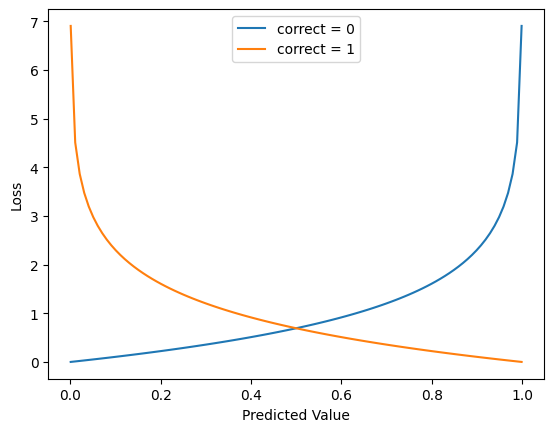

In [3]:
# loss function 
lossfunBCE = nn.BCELoss()

# create predictions and real answer
yHat = torch.linspace(0.001,.999,101)
y1 = torch.tensor(0.)
y2 = torch.tensor(1.)

# compute MSE loss function
L = np.zeros((101,2))
for i, yy in enumerate(yHat):
    L[i,0]= lossfunBCE(yy,y1)
    L[i,1]= lossfunBCE(yy,y2)

plt.plot(yHat, L)
plt.xlabel('Predicted Value')
plt.ylabel('Loss')
plt.legend(['correct = 0', 'correct = 1'])
plt.show()



In [6]:
# loss function
yHat = torch.tensor(2.)
# vector of output layer ## error
# print(lossfunBCE(yHat, y2))

sig = nn.Sigmoid()
print(lossfunBCE(sig(yHat), y2))

tensor(0.1269)


In [7]:
# Recommended use of sigmoid + bce
lossfunBCE = nn.BCEWithLogitsLoss()
yHat = torch.tensor(2.)
print(lossfunBCE(yHat,y2))


tensor(0.1269)


In [34]:
# Catergorical cross-entropy
lossfunCCE = nn.CrossEntropyLoss()

# vector of output layer (pre-softmax)
yHat = torch.tensor([[1.,5,3]])

for i in range(3):
    correctAnswer = torch.tensor([i])
    thisloss = lossfunCCE(yHat, correctAnswer).item()
    print('Loss when correct answer is %g: %g ' %(i, thisloss))

Loss when correct answer is 0: 4.14293 
Loss when correct answer is 1: 0.142932 
Loss when correct answer is 2: 2.14293 


In [35]:
# repeating using pre soft maxified output 
sm = nn.Softmax(dim = 1)
yHat_sm = sm(yHat)

for i in range(3):
    correctAnswer = torch.tensor([i])
    thisloss = lossfunCCE(yHat_sm, correctAnswer).item()
    print('Loss when correct answer is %g: %g'%(i, thisloss))

Loss when correct answer is 0: 1.49259
Loss when correct answer is 1: 0.641652
Loss when correct answer is 2: 1.39115


In [37]:
# repeating using pre soft maxified output 
sm = nn.LogSoftmax(dim = 1)
yHat_logsm = sm(yHat)

print(yHat)
print(yHat_sm)
print(yHat_logsm)

tensor([[1., 5., 3.]])
tensor([[0.0159, 0.8668, 0.1173]])
tensor([[-4.1429, -0.1429, -2.1429]])


In [39]:
class myLoss(nn.Module):
    def __init__(self):
        super().__init__()

    
    def forward(self, x, y):
        loss = torch.abs(x-y)
        return loss

lfun = myLoss()
lfun(torch.tensor(4), torch.tensor(5.2))

tensor(1.2000)